<a href="https://colab.research.google.com/github/nourshraif/Anomaly-Detection/blob/main/Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Import the necessary Libraries***


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support


# ***Read the data***

In [4]:
df = pd.read_csv('creditcard.csv')


In [5]:
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164534 entries, 0 to 164533
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    164534 non-null  float64
 1   V1      164533 non-null  float64
 2   V2      164533 non-null  float64
 3   V3      164533 non-null  float64
 4   V4      164533 non-null  float64
 5   V5      164533 non-null  float64
 6   V6      164533 non-null  float64
 7   V7      164533 non-null  float64
 8   V8      164533 non-null  float64
 9   V9      164533 non-null  float64
 10  V10     164533 non-null  float64
 11  V11     164533 non-null  float64
 12  V12     164533 non-null  float64
 13  V13     164533 non-null  float64
 14  V14     164533 non-null  float64
 15  V15     164533 non-null  float64
 16  V16     164533 non-null  float64
 17  V17     164533 non-null  float64
 18  V18     164533 non-null  float64
 19  V19     164533 non-null  float64
 20  V20     164533 non-null  float64
 21  V21     16

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,164534.000000,164533.000000,164533.000000,164533.000000,164533.000000,164533.000000,164533.000000,164533.000000,164533.000000,164533.000000,...,164533.000000,164533.000000,164533.000000,164533.000000,164533.000000,164533.000000,164533.000000,164533.000000,164533.000000,164533.000000
mean,58866.836757,-0.191243,0.050156,0.537739,0.130029,-0.194730,0.062812,-0.089545,0.038563,0.021454,...,-0.032979,-0.093052,-0.024490,0.010129,0.100526,0.013719,0.002285,0.002403,86.874901,0.002176
std,25904.273879,1.845074,1.609273,1.366180,1.366289,1.333955,1.292413,1.206277,1.232591,1.157854,...,0.744253,0.660329,0.582049,0.597600,0.459226,0.491749,0.391648,0.308786,243.612241,0.046595
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,40551.500000,-0.997891,-0.529803,-0.002542,-0.728313,-0.842380,-0.685213,-0.589216,-0.156811,-0.660376,...,-0.231570,-0.549120,-0.170628,-0.330117,-0.182573,-0.330586,-0.064428,-0.020987,5.370000,0.000000
50%,59332.000000,-0.211344,0.117315,0.654755,0.137141,-0.241471,-0.197357,-0.037798,0.061242,-0.080375,...,-0.057273,-0.074196,-0.038121,0.061209,0.143904,-0.059643,0.009427,0.021729,21.390000,0.000000
75%,76911.750000,1.177607,0.809125,1.314853,0.952175,0.348601,0.452158,0.452323,0.355990,0.648540,...,0.122063,0.348856,0.095139,0.414446,0.403519,0.275263,0.089698,0.078241,76.070000,0.000000
max,116787.000000,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [9]:
df.isnull().sum()

,0
Time,0
V1,1
V2,1
V3,1
V4,1
V5,1
V6,1
V7,1
V8,1
V9,1


In [13]:
# Drop rows with any missing values
df.dropna(inplace=True)

# Verify that the missing values have been removed
display(df.isnull().sum())

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


# ***Distribution of Amount & Time***

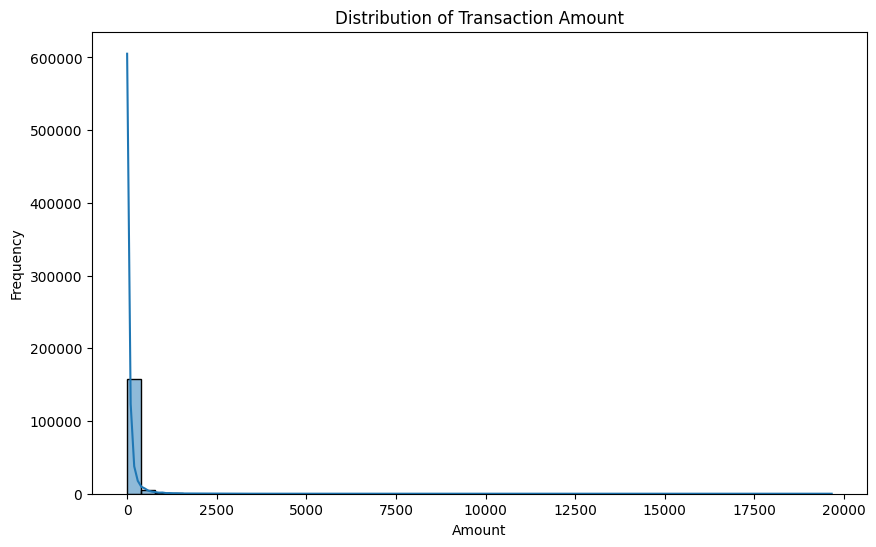

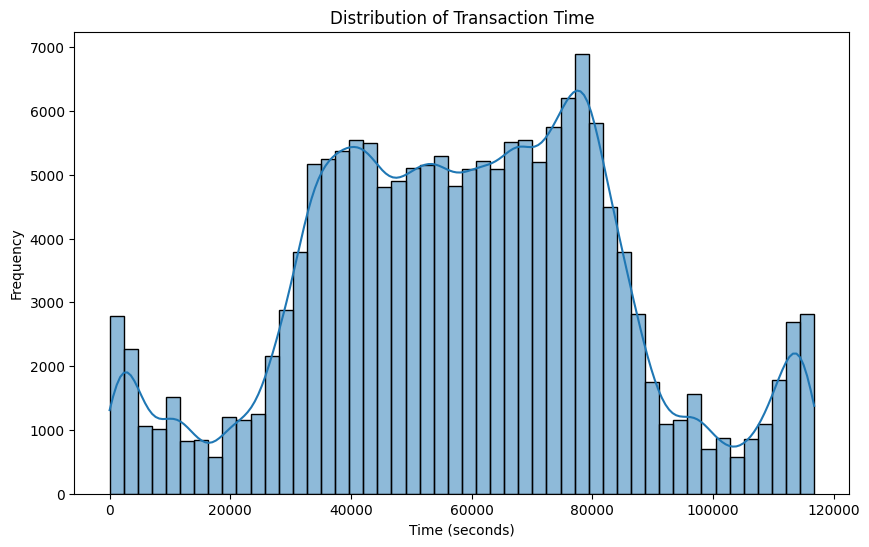

In [14]:
#Distribution of Amount
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Distribution of Time
plt.figure(figsize=(10, 6))
sns.histplot(df['Time'], bins=50, kde=True)
plt.title('Distribution of Transaction Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()



**Distribution of Transaction Amount**

**Highly Skewed:**
  The most obvious feature is that the distribution is heavily skewed to the right. This means that the vast majority of transactions are for small amounts, while there are a few transactions with very high amounts. This is very typical of credit card data.
  
**Potential for Outliers:**
 The long tail on the right suggests the presence of outliers. These could be legitimate large purchases, but they could also be fraudulent transactions.

**Distribution of Transaction Time**

**Bimodal Distribution:**

 The 'Time' distribution has two distinct peaks, a pattern known as a bimodal distribution. This suggests that there are two periods of high transaction activity.

**Daily Cycles:**

 Given that the 'Time' is measured in seconds from the first transaction, these two peaks likely correspond to the daily cycles of human activity. One peak could be during the day, and the other could be during the evening or night.
**Implication for Modeling:**

 This cyclical pattern could be a useful feature for a fraud detection model. For example, a transaction that occurs at an unusual time (i.e., during a period of low activity) might be more likely to be fraudulent.

# ***Check Data Imbalance***

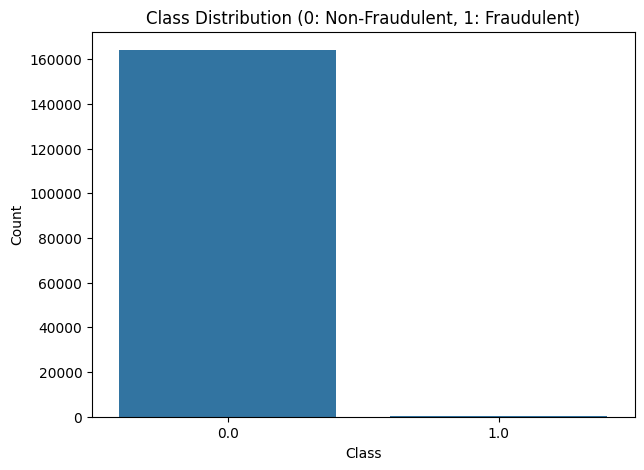

In [15]:

plt.figure(figsize=(7, 5))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Non-Fraudulent, 1: Fraudulent)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

 The class distribution plot clearly shows that the dataset is highly imbalanced.

# ***Data Preprocessing***

In [16]:
# Create a copy of the dataframe to avoid modifying the original one
data = df.copy()

# Get the column names to be scaled (all columns except 'Class')
columns_to_scale = data.columns[data.columns != 'Class']

# Scale the selected columns
scaler = StandardScaler()
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Display the first few rows of the scaled data
display(data.head())

# Now, we will separate the features (X) from the target (y)
# We will use 'y' later to evaluate the performance of our unsupervised models
X = data.drop('Class', axis=1)
y_true = data['Class']

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-2.272497,-0.633344,-0.076393,1.462921,0.913518,-0.107643,0.309171,0.272860,0.048787,0.295662,...,0.019714,0.561676,-0.147726,0.095045,0.061001,-0.412475,0.335184,-0.075964,0.257562,0.0
1,-2.272497,0.749620,0.134219,-0.271751,0.232840,0.190972,-0.112327,0.008905,0.037757,-0.239132,...,-0.259047,-0.826287,0.216096,-0.585637,0.145123,0.228117,-0.028771,0.039900,-0.345570,0.0
2,-2.272458,-0.632557,-0.863945,0.904327,0.182795,-0.231244,1.344534,0.730353,0.169653,-1.326690,...,0.377530,1.309550,1.604513,-1.170368,-0.932373,-0.310760,-0.147167,-0.201290,1.197748,0.0
3,-2.272458,-0.420054,-0.146266,0.918808,-0.727023,0.138252,0.916421,0.271210,0.274928,-1.216459,...,-0.101204,0.148905,-0.284908,-1.984116,1.190812,-0.479204,0.154318,0.191247,0.150342,0.0
4,-2.272420,-0.524094,0.514259,0.740006,0.199816,-0.159274,0.025618,0.565780,-0.250770,0.687727,...,0.031640,1.349831,-0.194087,0.219441,-0.667508,0.993546,0.554422,0.688989,-0.069311,0.0


# ***Correlation Matrix***

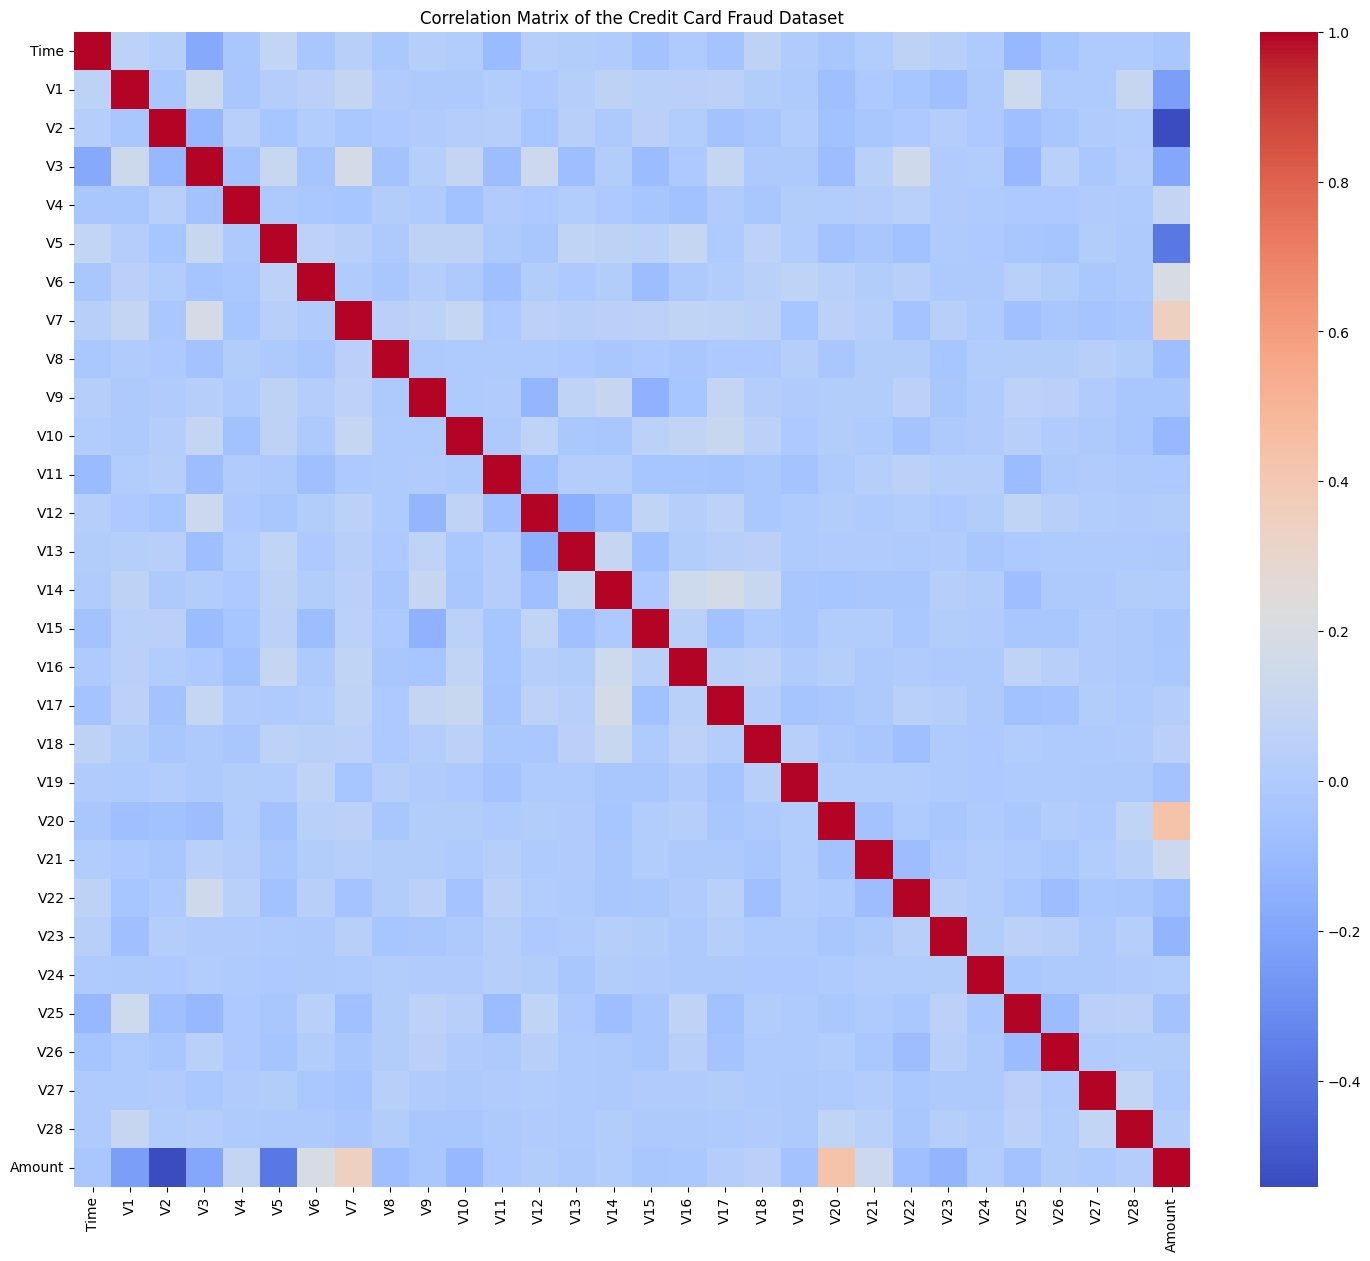

In [20]:
# Calculate the correlation matrix
corr_matrix = X.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of the Credit Card Fraud Dataset')
plt.show()

# ***Now , we can move to dimensionality reduction***

For data visualization, we will use PCA to reduce the data to 3 components, and then we will create a 3D scatter plot.

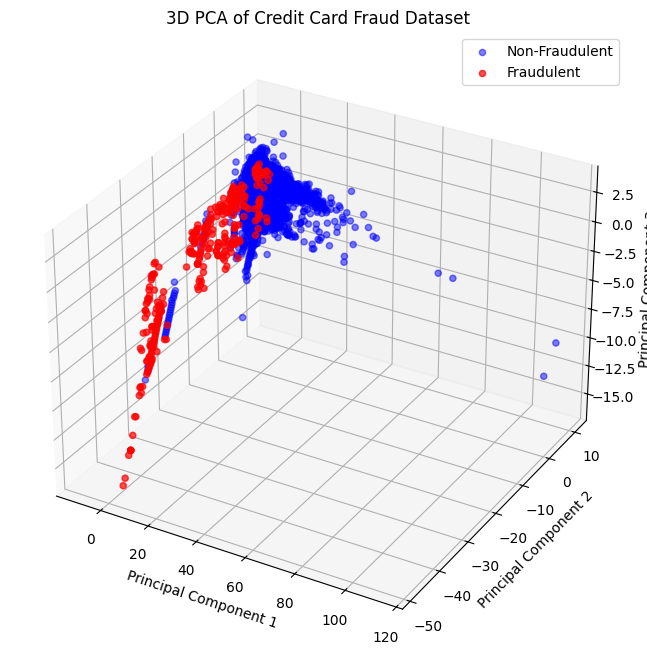

In [24]:
# Plot the PCA results in 3D with a legend
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for non-fraudulent transactions
ax.scatter(df_pca_3d[df_pca_3d['Class'] == 0]['principal component 1'],
           df_pca_3d[df_pca_3d['Class'] == 0]['principal component 2'],
           df_pca_3d[df_pca_3d['Class'] == 0]['principal component 3'],
           c='blue', label='Non-Fraudulent', alpha=0.5)

# Scatter plot for fraudulent transactions
ax.scatter(df_pca_3d[df_pca_3d['Class'] == 1]['principal component 1'],
           df_pca_3d[df_pca_3d['Class'] == 1]['principal component 2'],
           df_pca_3d[df_pca_3d['Class'] == 1]['principal component 3'],
           c='red', label='Fraudulent', alpha=0.7)

ax.set_title('3D PCA of Credit Card Fraud Dataset')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

plt.show()

**The Dense Blue Cloud:**

 Notice how the vast majority of the points are blue and are packed together in a dense cloud. This is the "normal" behavior of your data. It represents the typical patterns of legitimate credit card transactions.

**The Scattered Red Points:**

Now, look at the red points. They are much more spread out. While some of them are mixed in with the blue cloud, many of them are on the edges of the cloud or are completely separate from it.
What this tells us:

This plot provides strong visual evidence that fraudulent transactions are different from normal transactions. They don't follow the same patterns as the legitimate transactions, and this is why they appear as outliers or anomalies in the 3D space.

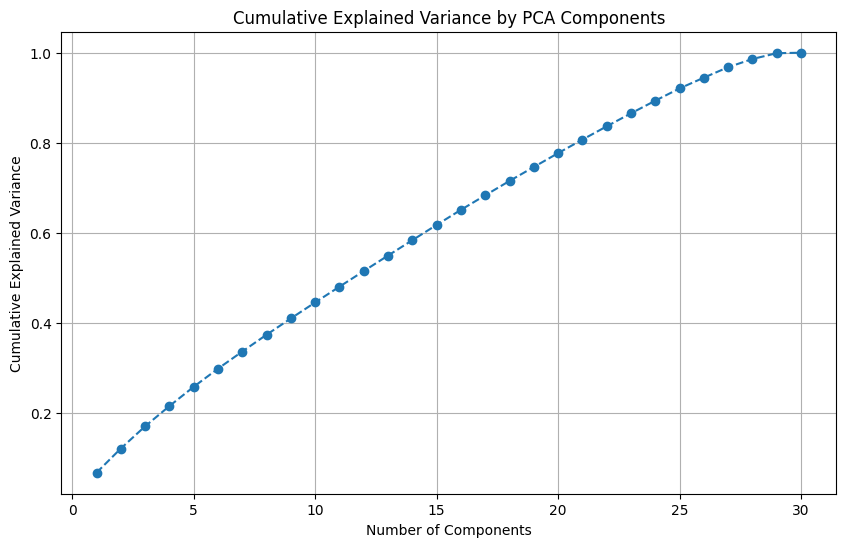

In [18]:
# Apply PCA without specifying the number of components
pca = PCA()
pca.fit(X)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

We will take all the 30 features for now

# **Training & Evaluation**

In [27]:
# Train the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
y_pred_iso = iso_forest.fit_predict(X)

# The output of the model is -1 for anomalies (fraud) and 1 for inliers (non-fraud).
# We need to convert these to 1 for fraud and 0 for non-fraud to match our 'y_true' labels.
y_pred_iso[y_pred_iso == 1] = 0
y_pred_iso[y_pred_iso == -1] = 1

# Evaluate the model
print("Isolation Forest Classification Report:")
print(classification_report(y_true, y_pred_iso))

print("Isolation Forest Confusion Matrix:")
print(confusion_matrix(y_true, y_pred_iso))

Isolation Forest Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    164175
         1.0       0.05      0.83      0.09       358

    accuracy                           0.96    164533
   macro avg       0.52      0.90      0.54    164533
weighted avg       1.00      0.96      0.98    164533

Isolation Forest Confusion Matrix:
[[158400   5775]
 [    60    298]]


In [28]:
# Train the One-Class SVM model
one_class_svm = OneClassSVM(nu=0.01, kernel="rbf", gamma=0.01)
y_pred_svm = one_class_svm.fit_predict(X)

# The output of the model is -1 for anomalies (fraud) and 1 for inliers (non-fraud).
# We need to convert these to 1 for fraud and 0 for non-fraud to match our 'y_true' labels.
y_pred_svm[y_pred_svm == 1] = 0
y_pred_svm[y_pred_svm == -1] = 1

# Evaluate the model
print("One-Class SVM Classification Report:")
print(classification_report(y_true, y_pred_svm))

print("One-Class SVM Confusion Matrix:")
print(confusion_matrix(y_true, y_pred_svm))

One-Class SVM Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    164175
         1.0       0.14      0.64      0.23       358

    accuracy                           0.99    164533
   macro avg       0.57      0.82      0.61    164533
weighted avg       1.00      0.99      0.99    164533

One-Class SVM Confusion Matrix:
[[162762   1413]
 [   128    230]]


# ***Which Algorithm should we choose?***

***If we choose the Isolation Forest:***

**The good:** We will catch a lot of the fraudulent transactions (83% of them). This is great for minimizing  losses from fraud.

**The bad:** We will also have a very high number of false alarms (over 5,000). This means we will be flagging a lot of legitimate transactions as fraudulent, which could lead to angry customers and a lot of extra work for  fraud investigation team.

***If we choose the One-Class SVM:***

**The good:** We will have a much more manageable number of false alarms (around 1,400). This means we will be bothering fewer legitimate customers and  fraud investigation team will have less work to do.
**The bad:** We will miss more of the fraudulent transactions (you'll only catch 64% of them). This means we will have higher losses from fraud.
So, which one is better?

In a typical fraud detection scenario, the goal is usually to maximize the number of fraudulent transactions we catch (i.e., maximize recall), even if it means dealing with a higher number of false alarms. This is because the cost of a missed fraudulent transaction is often much higher than the cost of investigating a false alarm.

Therefore, in this specific case, We would argue that the Isolation Forest is the "better" model for the primary goal of detecting fraudulent transactions.

# **Insights**

In [33]:
# Create a new column in the original dataframe with the Isolation Forest predictions
df['iso_forest_pred'] = y_pred_iso

# Create a dataframe of the transactions that were flagged as fraudulent
fraudulent_transactions = df[df['iso_forest_pred'] == 1]

# Create a dataframe of the non-fraudulent transactions
non_fraudulent_transactions = df[df['iso_forest_pred'] == 0]

# Display the first few rows of the fraudulent transactions dataframe
display(fraudulent_transactions.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,iso_forest_pred
18,14.0,-5.401258,-5.450148,1.186305,1.736239,3.049106,-1.763406,-1.559738,0.160842,1.233090,...,0.984460,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80,0.0,1
51,36.0,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006868,-0.278736,...,-0.381671,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.95,0.0,1
82,52.0,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,...,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,1.46,0.0,1
85,55.0,-4.575093,-4.429184,3.402585,0.903915,3.002224,-0.491078,-2.705393,0.666451,1.922216,...,0.853360,-0.971600,-0.114862,0.408300,-0.304576,0.547785,-0.456297,200.01,0.0,1
140,87.0,-5.101877,1.897022,-3.458034,-1.277543,-5.517758,2.098366,3.329603,1.250966,0.271501,...,-0.678879,-0.555900,-0.761660,0.066611,0.767227,0.731634,-0.860310,919.60,0.0,1


***Percentage of actual fraudulent transactions***


In [34]:
# Get the number of actual frauds that were correctly identified (True Positives)
true_positives = confusion_matrix(y_true, y_pred_iso)[1, 1]

# Get the number of actual frauds that were missed (False Negatives)
false_negatives = confusion_matrix(y_true, y_pred_iso)[1, 0]

# Calculate the percentage of actual fraud detected (recall)
recall = true_positives / (true_positives + false_negatives)

print(f"Percentage of actual fraud detected (Recall): {recall:.2%}")

Percentage of actual fraud detected (Recall): 83.24%


**Distribution of 'Amount' in both classes**

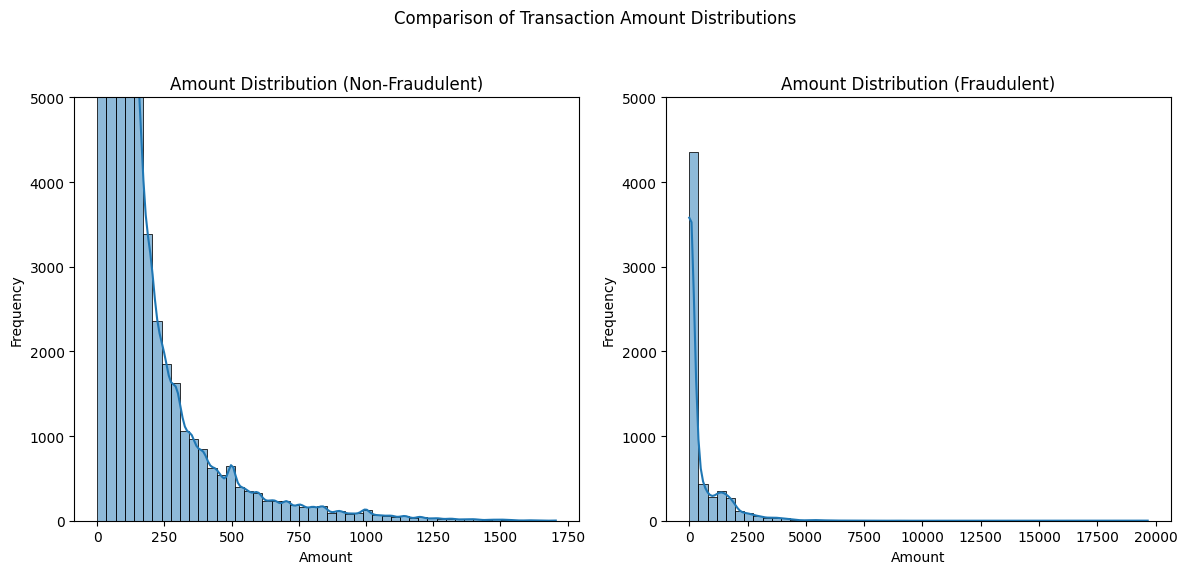

In [36]:
# Plotting the distribution of 'Amount' for both fraudulent and non-fraudulent transactions

plt.figure(figsize=(12, 6))

# Plot for non-fraudulent transactions
plt.subplot(1, 2, 1)
sns.histplot(non_fraudulent_transactions['Amount'], bins=50, kde=True)
plt.title('Amount Distribution (Non-Fraudulent)')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.ylim(0, 5000) # Setting a y-limit to make the plot more readable

# Plot for fraudulent transactions
plt.subplot(1, 2, 2)
sns.histplot(fraudulent_transactions['Amount'], bins=50, kde=True)
plt.title('Amount Distribution (Fraudulent)')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.ylim(0, 5000) # Setting the same y-limit for comparison

plt.suptitle('Comparison of Transaction Amount Distributions')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# **Analysis of the 'Amount' Distribution Plots:**

**Similar Shapes:**

Both plots show a distribution that is heavily skewed to the right, meaning that most transactions, whether fraudulent or not, are for small amounts.

**Subtle Differences:**

However, if you look closely at the plot for the fraudulent transactions, you can see that there is a slightly fatter tail. This suggests that while most fraudulent transactions are for small amounts, there is a slightly higher proportion of large-amount transactions in the fraudulent group compared to the non-fraudulent group.
What does this tell us?

This tells us that the transaction amount, on its own, is not a perfect predictor of fraud. However, it does seem to contain some useful information. It's likely that the transaction amount, when combined with other features, can help our model to identify fraudulent transactions.

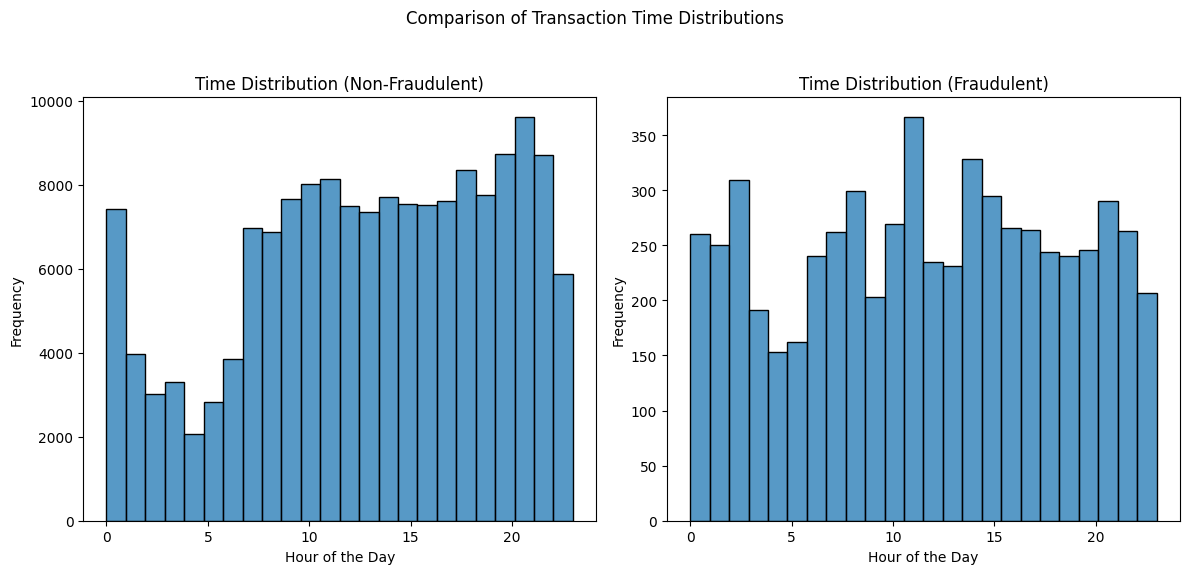

In [41]:
# Create an 'Hour' column from the 'Time' column
df['Hour'] = df['Time'].apply(lambda x: np.floor(x / 3600))
non_fraudulent_transactions.loc[:, 'Hour'] = non_fraudulent_transactions['Time'].apply(lambda x: np.floor(x / 3600))
fraudulent_transactions.loc[:, 'Hour'] = fraudulent_transactions['Time'].apply(lambda x: np.floor(x / 3600))

# Plotting the distribution of 'Hour' for both fraudulent and non-fraudulent transactions

plt.figure(figsize=(12, 6))

# Plot for non-fraudulent transactions
plt.subplot(1, 2, 1)
sns.histplot(non_fraudulent_transactions['Hour'] % 24, bins=24)
plt.title('Time Distribution (Non-Fraudulent)')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')

# Plot for fraudulent transactions
plt.subplot(1, 2, 2)
sns.histplot(fraudulent_transactions['Hour'] % 24, bins=24)
plt.title('Time Distribution (Fraudulent)')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')

plt.suptitle('Comparison of Transaction Time Distributions')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**we can infer two key things about the fraudulent transactions that our model has detected:**

**They have a different "Amount" profile:** While most fraudulent transactions are for small amounts, there is a slightly higher proportion of large-amount transactions in the fraudulent group compared to the non-fraudulent group.

**They have a different "Time" profile: **Fraudulent transactions are more evenly distributed throughout the day and have a noticeable peak during the early morning hours, when normal transaction activity is low. This suggests that fraudsters are more likely to make transactions at unusual times.